Connected component analysis

have binary image and label foreground objects. 

--2020-12-03 23:33:45--  https://github.com/Henry-Medeiros/images/raw/master/shapes.png
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Henry-Medeiros/images/master/shapes.png [following]
--2020-12-03 23:33:45--  https://raw.githubusercontent.com/Henry-Medeiros/images/master/shapes.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15132 (15K) [image/png]
Saving to: ‘shapes.png.2’

shapes.png.2        100%[===================>]  14.78K  --.-KB/s    in 0s      

2020-12-03 23:33:45 (49.2 MB/s) - ‘shapes.png.2’ saved [15132/15132]



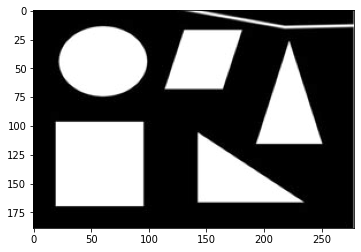

In [ ]:
import skimage
import cv2
import scipy
import matplotlib.pyplot as plt
from IPython.display import Image, display
import numpy as np
!wget 'https://github.com/Henry-Medeiros/images/raw/master/shapes.png'
img = cv2.imread('shapes.png',0)


plt.imshow(img,'gray')
plt.show()

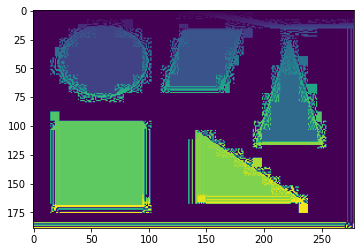

In [ ]:
from skimage.morphology import label

img_labels = label( img)

plt.imshow(img_labels)
plt.show()

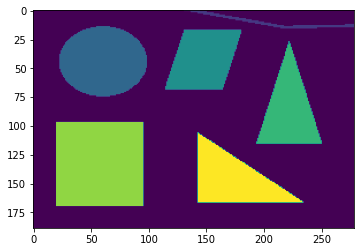

In [ ]:
# apply on binary image
from skimage.filters.thresholding import threshold_otsu
from skimage.morphology import label

# Convert to Binary
thresh = threshold_otsu(img)
img_bin = (img > thresh).astype(np.uint8)

# thr, img_b= cv2.threshold(img,127,255,cv2.THRESH_BINARY)

img_labels = label( img_bin)

plt.imshow(img_labels)
plt.show()

In [ ]:
# print connected Components properties

from skimage.measure import regionprops

img_props = regionprops(img_labels)

for i in img_props:
  print('Centroid = {}'.format(i.centroid))
  print('Bounding box = {}'.format(i.bbox))

Centroid = (9.81058495821727, 206.46796657381614)
Bounding box = (0, 131, 16, 279)
Centroid = (44.016953787257314, 60.4082581350834)
Bounding box = (14, 23, 75, 99)
Centroid = (42.52589489718203, 147.60700685453162)
Bounding box = (17, 115, 69, 181)
Centroid = (85.62204113310051, 222.19712844392706)
Bounding box = (27, 194, 116, 251)
Centroid = (133.0, 57.5)
Bounding box = (97, 20, 170, 96)
Centroid = (146.14727592267135, 173.56625659050965)
Bounding box = (106, 143, 167, 235)


Hough Transform - Line Detection

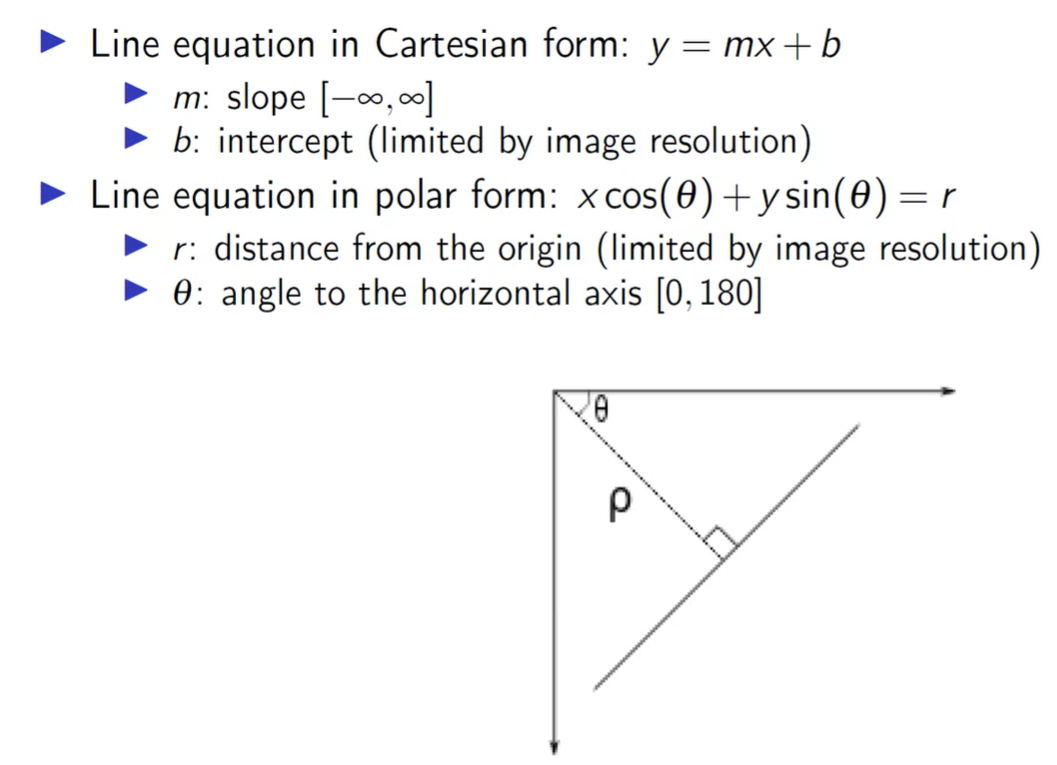

for line detection:
1. create discrete counters for each value of r and theta
2. For each point(x,y) increment all value of r and theta
3. choose the pair of (r, theta) corresponding to local maxima

--2020-12-04 01:11:26--  https://github.com/Henry-Medeiros/images/raw/master/checkerboard_pattern.png
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Henry-Medeiros/images/master/checkerboard_pattern.png [following]
--2020-12-04 01:11:26--  https://raw.githubusercontent.com/Henry-Medeiros/images/master/checkerboard_pattern.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 888 [image/png]
Saving to: ‘checkerboard_pattern.png.6’

checkerboard_patter 100%[===================>]     888  --.-KB/s    in 0s      

2020-12-04 01:11:26 (39.5 MB/s) - ‘checkerboard_pattern.png.6’ saved [888/888]



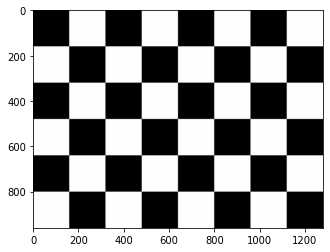

In [ ]:
import cv2
import scipy
import matplotlib.pyplot as plt
from IPython.display import Image, display
import numpy as np
from skimage.filters.thresholding import threshold_otsu
!wget 'https://github.com/Henry-Medeiros/images/raw/master/checkerboard_pattern.png'


img = cv2.imread('checkerboard_pattern.png',0)
img = cv2.cvtColor(img, cv2.COLOR_BAYER_BG2GRAY)

plt.imshow(img,'gray')
plt.show()

# convert to binary
# thresh = threshold_otsu(img)
# img_bin = (img > thresh).astype(np.uint8)

# plt.imshow(img_bin, 'gray')
# plt.show()




In [ ]:
def plotLine (img, rho, theta):
  a = np.cos(theta)
  b = np.sin(theta)
  x0 = a * rho
  y0 = b * rho
  x1 = int(x0 + 59000 * (-b))
  y1 = int(y0 + 59000 * (a))
  x2 = int(x0 - 59000 * (-b))
  y2 = int(y0 - 59000 * (a))
  cv2.line(img,(x1,y1),(x2,y2), (255,0,0),2)

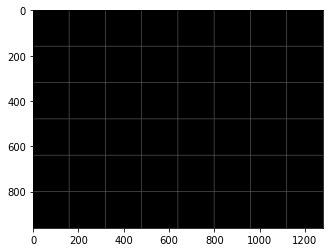

[[[ 159.           1.5707964]]

 [[ 319.           1.5707964]]

 [[ 479.           1.5707964]]

 [[ 639.           1.5707964]]

 [[ 799.           1.5707964]]

 [[ 319.           0.       ]]

 [[ 639.           0.       ]]

 [[ 959.           0.       ]]

 [[ 159.           0.       ]]

 [[ 479.           0.       ]]

 [[ 799.           0.       ]]

 [[1119.           0.       ]]]


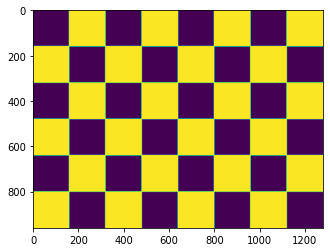

In [ ]:
img_edges = cv2.Canny(img, 1, 100)

plt.imshow(img_edges, 'gray')
plt.show()

lines = cv2.HoughLines(img_edges, 1, np.pi/180 , 200) # ( image, resolution of distance (rho), theta, threshold )

print(lines)

for line in lines:
  for rho, theta in line:
    plotLine(img, rho, theta)

plt.imshow(img)
plt.show()

Hough Circle Transform

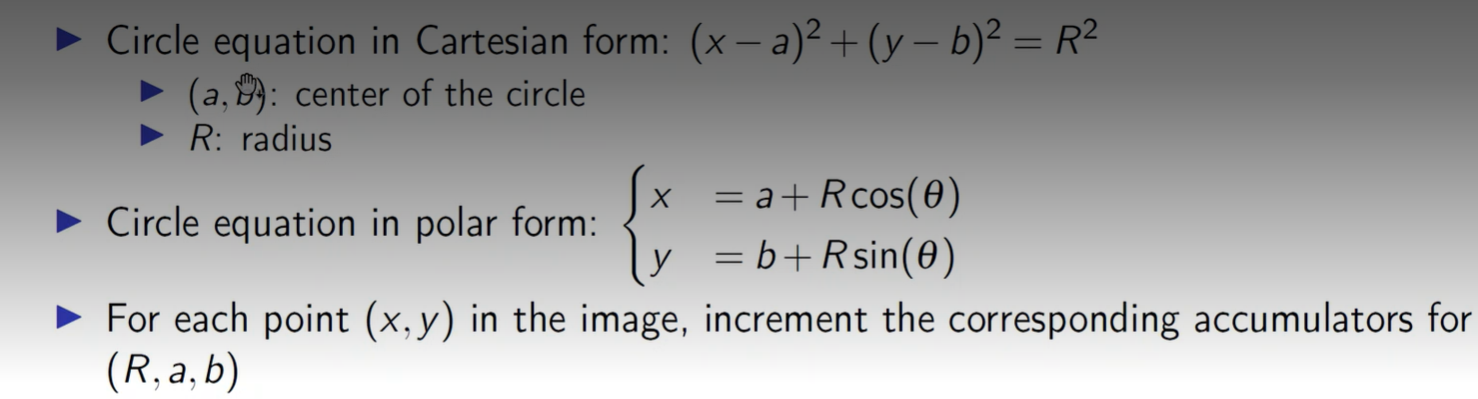

--2020-12-04 01:53:34--  https://github.com/Henry-Medeiros/images/raw/master/holes1.png
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Henry-Medeiros/images/master/holes1.png [following]
--2020-12-04 01:53:34--  https://raw.githubusercontent.com/Henry-Medeiros/images/master/holes1.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 86726 (85K) [image/png]
Saving to: ‘holes1.png.5’

holes1.png.5        100%[===================>]  84.69K  --.-KB/s    in 0.02s   

2020-12-04 01:53:35 (5.40 MB/s) - ‘holes1.png.5’ saved [86726/86726]



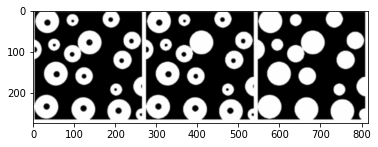

In [ ]:
import cv2
import scipy
import matplotlib.pyplot as plt
from IPython.display import Image, display
import numpy as np
from skimage.filters.thresholding import threshold_otsu
!wget 'https://github.com/Henry-Medeiros/images/raw/master/holes1.png'


img = cv2.imread('holes1.png',0)
img = cv2.cvtColor(img, cv2.COLOR_BAYER_BG2GRAY)

plt.imshow(img,'gray')
plt.show()

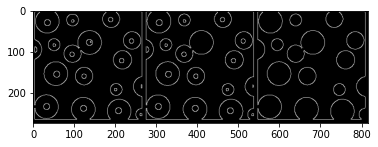

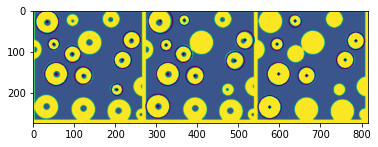

In [ ]:

img_edges = cv2.Canny(img, 1, 100)

plt.imshow(img_edges, 'gray')
plt.show()

# ( image, method, dp( resolution), mindist, param1 , param2, *minRadius, *maxRadius )
circles = cv2.HoughCircles(img_edges, cv2.HOUGH_GRADIENT, 1, 10, param1 = 100, param2 = 30, minRadius =10 ,
                           maxRadius= 50) 

circles = np.uint16(np.around(circles))

for i in circles[0,:]:
  # an outer circle is drawn for visualization
  cv2.circle(img, (i[0],i[1]), i[2], (0,255,0),2)
  # its center is marked
  cv2.circle(img, (i[0],i[1]), 2,(0,0,255), 3)
  

plt.imshow(img)
plt.show()